In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


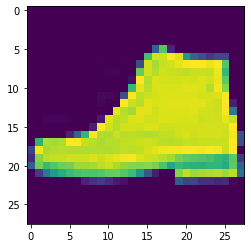

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(train_x[42])

In [0]:
train_x = train_x / 255.0
test_x = test_x / 255.0

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [9]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

model.fit(train_x, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5056 - accuracy: 0.8219
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3769 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3411 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3141 - accuracy: 0.8836
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2705 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2496 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [10]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8809


[0.33242183923721313, 0.8809000253677368]

In [11]:
classification = model.predict(test_x)
print(classification[0:3])

[[2.41070097e-08 4.31010852e-11 4.28580682e-09 1.35008366e-10
  3.11369277e-08 1.86553370e-04 7.60030705e-09 3.34448647e-03
  6.55298962e-08 9.96468782e-01]
 [3.94278904e-04 1.91830152e-09 9.72684622e-01 4.61046602e-06
  1.06552765e-02 2.46088787e-14 1.62611678e-02 1.56583291e-21
  9.93768694e-08 2.22668464e-11]
 [4.39073133e-08 1.00000000e+00 3.90674262e-14 2.14315032e-09
  1.39492840e-09 6.70111504e-25 2.66384720e-10 8.34273545e-23
  5.85968947e-12 3.83821317e-19]]


In [12]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

model.fit(train_x, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4702 - accuracy: 0.8316
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3590 - accuracy: 0.8690
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3192 - accuracy: 0.8823
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2964 - accuracy: 0.8907
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2785 - accuracy: 0.8960
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2622 - accuracy: 0.9027
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2519 - accuracy: 0.9055
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2409 - accuracy: 0.9101
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2309 - accuracy: 0.9126
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [13]:
class customCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.4):
      print("\nOkay, that's enough!")
      self.model.stop_training = True

callbacks = customCallBack()
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

model.fit(train_x, train_y, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4712 - accuracy: 0.8304
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3582 - accuracy: 0.8686
